# Load data

In [1]:
import pandas as pd
from datetime import datetime , timedelta
import matplotlib.pyplot as plt 

dstest = "/Users/abdellahwadjinny/Downloads/test/dataMining/dstest.csv"
df = pd.read_csv(dstest)

# Question 1

**Knowing the goal of the our technology, define a metric to measure our performance. Calculate that performance score for each of the companies in the dataset.**



Knowing the goal of your technology wich is reducing the volume of data loaded from the CDN, a good metric is the percentage of data loaded form the  P2P netwoork :

$$Performance = \frac{Volume_{P2P}}{Volume_{P2P} + Volume_{CDN}}$$

Below the performance for each company. Your company is by fare the most successful.




In [2]:
q1 = df[["company","p2p","cdn"]].groupby("company").sum(["p2p","cdn"])
q1["performance"] = q1["p2p"]/(q1["cdn"] + q1["p2p"])
q1

,p2p,cdn,performance
company,,,
Flash Infos,1.156855e+11,1.778905e+11,0.394056
Sports News,1.880077e+10,6.669082e+10,0.219914
Streamroot TV,3.177736e+12,2.628596e+12,0.547288


# Question 2
## 2.1

**How can we know whether a payload is the first payload of a viewer's session?**

Payloads are sent every 2 minutes, so the first payload is sent after 120000 ms from the begeining of the session, which means that the first payload is characterized by a `sessionDuration` equal to 120000 ms.


## 2.2

**Add a column `isFirstPayload` to the dataset, that must be True if the row represents a payload that was the first payload sent by a viewer, and False otherwise.**

In [55]:
df1 = df.copy()
df1["isFirstPayload"] = df["sessionDuration"].apply(lambda x: x == 120000.0)
df1

,company,live,mediaEngine,p2p,cdn,upload,peers_count,peers_match,timestamp,sessionDuration,playbackErrorCount,totalPlaybackErrorCount,content,isFirstPayload
0,Streamroot TV,VOD,ME1,0.0,8507376.0,0.0,0.00,1,1562469807407,120000.0,0,0,content-09235,True
1,Streamroot TV,VOD,ME1,0.0,5778744.0,0.0,0.00,0,1562469927310,240000.0,0,0,content-09235,False
2,Streamroot TV,VOD,ME1,0.0,7692960.0,0.0,0.00,0,1562470047330,360000.0,0,0,content-09235,False
3,Streamroot TV,VOD,ME1,0.0,8229888.0,0.0,0.00,0,1562470167720,480000.0,0,0,content-09235,False
4,Streamroot TV,VOD,ME1,0.0,10387000.0,0.0,0.00,0,1562470287353,600000.0,0,0,content-09235,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
385160,Streamroot TV,VOD,ME1,14849556.0,0.0,76800.0,19.98,40,1562478631672,1800000.0,0,0,content-05335,False
385161,Streamroot TV,VOD,ME1,12287680.0,0.0,417400.0,19.77,40,1562478749635,1920000.0,0,0,content-05335,False
385162,Streamroot TV,VOD,ME1,13229184.0,0.0,6588.0,19.70,40,1562478869650,2040000.0,0,0,content-05335,False
385163,Streamroot TV,VOD,ME1,3515600.0,0.0,2000896.0,19.23,40,1562478989910,2160000.0,0,0,content-05335,False


## 2.3
**Use that column to calculate the number of distinct viewers that sent payloads for each company.**

Below the the number of distinct viewers for each company

In [4]:
q23 = df1[df1.isFirstPayload]
q23 = q23[["company", "isFirstPayload"]].groupby("company").count()
q23 = q23.rename(columns = {"isFirstPayload":"numberViewers"})
q23

,numberViewers
company,
Flash Infos,805
Sports News,115
Streamroot TV,19914


# Question 3
## 3.1
**Let's consider a viewer A who starts a video at T=0, then has a playback error at T = 2 minutes 30 seconds, and then another one at T=6 minutes 20 seconds. What will be the values of the fields `playbackErrorCount` and `totalPlaybackErrorCount` in the first 5 payloads sent by viewer A?**

Below the values of `playbackErrorCount` and `totalPlaybackErrorCount` in the first 5 payloads

Payload | playbackErrorCount | totalPlaybackErrorCount
--- | --- | ---
**1** | 0 | 0
**2** | 1 | 1
**3** | 0 | 1
**4** | 1 | 2
**5** | 0 | 2

## 3.2

**Calculate the number of distinct viewers that had at least 1 playback error during their session.**

We can count tha nimber of viewers that had at least 1 playback by counting the number the first playback back error wich is caracterized by 
$$totalPlaybackErrorCount = 1$$ 
and 
$$playbackErrorCount = 1$$

This give us 8 viewers that had a playback error

In [5]:
df1[(df1.totalPlaybackErrorCount == 1) & (df1.playbackErrorCount == 1)].shape[0]

8

# Question 4
## 4.1
**Add a column "readableDate" to the dataset that will be the beginning of the 2 minutes window during which the payload was sent. For example, if a payload was sent at 11:35, the column "readableDate" should be 11:33.**

In [6]:
df3 = df1.copy()
df3 = df3[df3.company == "Streamroot TV"]

# f convert a timstamp in ms to hh:mm format
f = lambda x: (datetime.fromtimestamp(x/1000) - timedelta(minutes=2)).strftime("%H:%M")
df3["readableDate"] = df3["timestamp"].apply(f)
df3["readableDate"]

0         05:21
1         05:23
2         05:25
3         05:27
4         05:29
          ...  
385160    07:48
385161    07:50
385162    07:52
385163    07:54
385164    07:56
Name: readableDate, Length: 370832, dtype: object

## 4.2
**Plot the concurrency time series for the content content-05335.**

Since the concurrency is the number of viewers connected simustaneously on the same content.

We define the concurrency for a `readableDate` = **m** as the number of payloads between **m + 2** and **m + 4**.

* For payloads sent between **m + 2** and **m + 3** they will have a `readableDate` = **m**
* For payloads sent between **m + 3** and **m + 4** they will have a `readableDate` = **m + 1**

Based on that, here's the algorithm to calculate the concurrency time series for the content content-05335.

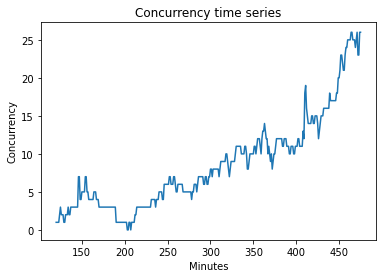

In [157]:
q42 = df3[df3.content == "content-05335"]["readableDate"].values
l = [int(time[:2])*60 + int(time[3:]) for time in q42]

min_t = min(l)
max_t = max(l)
serie = []
serie_range = range(min_t,max_t - 1)

for i in serie_range:
    s = 0
    for t in l:
        if i <= t <= i + 1 :
            s += 1
    serie.append(s)

plt.plot(serie_range,serie)
plt.xlabel("Minutes")
plt.ylabel("Concurrency")
plt.title("Concurrency time series");

## 4.3
**What is the average performance measured when the concurrency is lower than 10?**

Using the some logic as the question 4.2, below the peformanance :

In [159]:
# Create a column count_m that count the number of viewers for every content 
# in a one minute window
q43 = df3[["content","readableDate","company"]].groupby(["content","readableDate"]).count()
q43.rename(columns = {"company": "count_m"}, inplace = True)


# Function to count the number of viewers for every content in the minute after
def f(x):
    content = x.content
    minute = datetime.strptime(x.readableDate,"%H:%M")
    one_min = timedelta(minutes = 1) 
    minute_plus_one = (minute + one_min).strftime("%H:%M")
    
    try :
        c = q43.loc[(content,minute_plus_one)].values[0]
    except KeyError :
        c = 0
    
    return c

# Create a column count_mPlusOne that count the number of viewers for every content 
# in a the minute after   
df_q43 = q43.reset_index()
df_q43["count_mPlusOne"] = df_q43.apply(f, axis = 1)


# Create the concurrency as defined in the question 4.2
df_q43["concurrency"] = df_q43["count_m"] + df_q43["count_mPlusOne"]
df4 = df3.merge(df_q43,how = 'inner', on = ['content','readableDate'])

# The performance when the concurrency is lower than 10
cncr10 = df4[df4.concurrency <=  10]
perf10 = cncr10[["p2p","cdn"]].sum()
perf10["p2p"]/(perf10["cdn"] +perf10["p2p"])


0.5437198961286758

## 4.4
**Starting from which concurrency can we say there is a 75% chance that the performance on a content is higher than 80%?**

Starting from 9 there's a 75% chance that the performance on a content is higher than 80%

1 0.30530240265120134
2 0.5137956748695004
3 0.5823529411764706
4 0.6153846153846154
5 0.6842105263157895
6 0.660377358490566
7 0.7027027027027027
8 0.6333333333333333
9 0.75
10 0.7333333333333333
11 0.5833333333333334
12 0.5833333333333334
13 0.7
14 0.6666666666666666
15 0.625
16 0.625
17 1.0
18 1.0
19 1.0
20 1.0
21 1.0
22 1.0
23 0.6666666666666666
24 0.6666666666666666
25 0.5
26 1.0


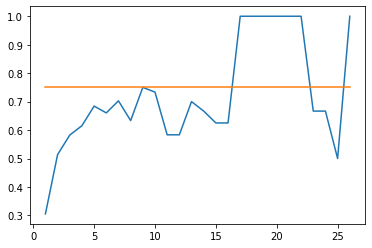

In [165]:
l = []
concurrency_range = range(1,max(df4.concurrency) + 1 )
for i in concurrency_range:
    # Rows that have a concurrency  greater than i
    cncr_i = df4[df4.concurrency >=  i]
    
    # Calculate the performance for every content 
    perf_i = cncr_i[["content", "p2p","cdn"]].groupby("content").sum()
    perf_i["performance"] = perf_i["p2p"]/(perf_i["cdn"] + perf_i["p2p"])
    
    # Add a column isGreaterThan80 that indicate if the performance is greater then 80%
    perf_i["isGreaterThan80"] = perf_i["performance"].apply(lambda x: x >= 0.8)
    
    # Calculate the proba that the performance on a content is higher than 80%
    proba_i = perf_i["isGreaterThan80"].mean()
    l.append(proba_i)
    print(i, proba_i)
    
# Plot the result 
plt.plot(concurrency_range, l)
plt.plot(concurrency_range, len(concurrency_range)*[0.75]);